# Text Classification 
## Problem Statement
A Cyber Security product to Identify the hacker attack which are safe or not.

## Dataset 

Data contains request payload and a field IsSafe which has true and false value. When the Value is True that means request is safe and when it is false request is not safe and it should be blocked.


## Library Used

* JSON
* Pandas
* NLTK
* Sklearn
* Matplotlib

### Importing Libraries





In [298]:
import pandas as pd
import json
import urllib.request
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split




### Loading Dataset

In [299]:

with urllib.request.urlopen("https://raw.githubusercontent.com/KeshriPooja/Modeling-Technique/master/NLP/CyberSecurity.json") as url:
    data = json.loads(url.read().decode())
    

Converting json data into pandas Dataframe.

In [300]:
df=json_normalize(data)

C:\Users\pooja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


**There is 1000 samples and 24 feature in dataset.**

In [301]:
df.shape

(1000, 24)

**Sample of Dataset**

In [302]:
df.head(10)

,isSafe,req.baseUrl,req.body.note.title,req.body.note.desc,req.fresh,req.headers.host,req.headers.user-agent,req.headers.content-type,req.headers.org_id,req.headers.user_session_id,...,req.hostname,req.ip,req.ips,req.originalUrl,req.path,req.protocol,req.secure,req.stale,req.subdomains,req.xhr
0,True,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
1,True,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
2,False,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
3,True,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
4,False,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
5,False,/crm/note,Tracy Smith,Area single occur chair opportunity art many. ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
6,True,/crm/note,Kevin Gonzalez,Resource politics already close phone special ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
7,False,/crm/note,Jacob Martin,note title <title onPropertyChange title onPro...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
8,False,/crm/note,Colleen Riggs,"Meeting "")) or ((""x""))=((""x Notes 12:30",False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False
9,False,/crm/note,Keith Campos,notes --><!-- -->> <img src=xxx:x onerror=java...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,...,example.com,::ffff:117.99.96.244,[],/crm/note,/note,http,False,True,[crm],False


### Describe Dataset

In [303]:
df.describe(include='all').T

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


,count,unique,top,freq
isSafe,1000,2,True,572
req.baseUrl,1000,1,/crm/note,1000
req.body.note.title,1000,994,Michael Smith,3
req.body.note.desc,1000,750,note title <title onPropertyChange title onPro...,36
req.fresh,1000,1,False,1000
req.headers.host,1000,1,example.com,1000
req.headers.user-agent,1000,1,insomnia/2020.4.2,1000
req.headers.content-type,1000,1,application/json,1000
req.headers.org_id,1000,1,5f572820f65af8ac955b2e83,1000
req.headers.user_session_id,1000,1,5fb27d3750b11901a35649fe,1000


**From the above table we can see that Most of the field has only a Single value. Only IsSafe, Request title and request description has different value.**

**So, we take Only Three feature For Our Analysis Purpose Request title, Description and IsSafe. While ISSafe is a target Variable.** 

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   isSafe                       1000 non-null   bool  
 1   req.baseUrl                  1000 non-null   object
 2   req.body.note.title          1000 non-null   object
 3   req.body.note.desc           1000 non-null   object
 4   req.fresh                    1000 non-null   bool  
 5   req.headers.host             1000 non-null   object
 6   req.headers.user-agent       1000 non-null   object
 7   req.headers.content-type     1000 non-null   object
 8   req.headers.org_id           1000 non-null   object
 9   req.headers.user_session_id  1000 non-null   object
 10  req.headers.accept           1000 non-null   object
 11  req.headers.content-length   1000 non-null   object
 12  req.headers.user.name        1000 non-null   object
 13  req.headers.user.role        1000 

**There is no empty value for any feature in 1000 sample.**

In [305]:
df.isnull().sum()

isSafe                         0
req.baseUrl                    0
req.body.note.title            0
req.body.note.desc             0
req.fresh                      0
req.headers.host               0
req.headers.user-agent         0
req.headers.content-type       0
req.headers.org_id             0
req.headers.user_session_id    0
req.headers.accept             0
req.headers.content-length     0
req.headers.user.name          0
req.headers.user.role          0
req.hostname                   0
req.ip                         0
req.ips                        0
req.originalUrl                0
req.path                       0
req.protocol                   0
req.secure                     0
req.stale                      0
req.subdomains                 0
req.xhr                        0
dtype: int64

### Features of Dataset 

In [306]:
df.columns

Index(['isSafe', 'req.baseUrl', 'req.body.note.title', 'req.body.note.desc',
       'req.fresh', 'req.headers.host', 'req.headers.user-agent',
       'req.headers.content-type', 'req.headers.org_id',
       'req.headers.user_session_id', 'req.headers.accept',
       'req.headers.content-length', 'req.headers.user.name',
       'req.headers.user.role', 'req.hostname', 'req.ip', 'req.ips',
       'req.originalUrl', 'req.path', 'req.protocol', 'req.secure',
       'req.stale', 'req.subdomains', 'req.xhr'],
      dtype='object')

### Taking Required Features

In [307]:
df=df[['isSafe','req.body.note.title', 'req.body.note.desc']]

### Remaning Feature Names

In [308]:
df.rename(columns={"req.body.note.title":'Title',"req.body.note.desc":"Desc"},inplace=True)

C:\Users\pooja\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### After Removing and Renaming Our Dataset looks like

In [309]:
df.head()

,isSafe,Title,Desc
0,True,Tina Johnson,Top recognize eat. Fact whom spend area thing ...
1,True,Clayton Cooper,As possible American many prepare four strong....
2,False,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class
3,True,Laura Fisher,State third represent energy campaign not forg...
4,False,Tyler Santos,Us enjoy since. Time identify image position o...


**As we can see that Request Title is the Name so it will give any specific information to detecting request safe or not. So we can leave this field also and use only Description field which has text and according to which we will identify the request is True or not.**

**There is 572 True Request Sample and 428 False Request Sample. i.e 57% True Requests and 42.8 False Requests.**

In [310]:
df.isSafe.value_counts()

True     572
False    428
Name: isSafe, dtype: int64

### Ploting IsSafe Feature

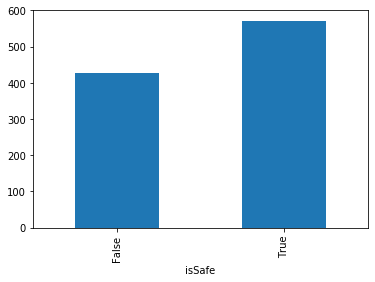

In [311]:
df.groupby('isSafe')['Desc'].count().plot(kind='bar')

## Text Analysis

Following Stepes For Analyzing Text Description

1. Converting whole dataset description text into a paragraph.
2. Remove Punchutuations.
3. Tokenize the whole text into words.
4. Removing English most common word like is, are, am, theetc.. by using Stopwords.
5. finding Vocabulary Of the Description request.


In [312]:
descp=df.Desc.str.cat(sep=' ')

tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(descp)

**After removing Punchuation 19150 words in the ?Dataset.**

In [313]:
len(new_words)

19150

In [314]:
stop_words = set(stopwords.words('english'))
new_words = [w for w in new_words if not w in stop_words]

vocabulary = set(new_words)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(new_words)

1834


**There is 1834 unique words in request Description.**

**Below we can see frequency of most Common Word and graph of top 50 word in the Dataset.**

In [315]:
frequency_dist.most_common()

[('1', 270),
 ('javascript', 188),
 ('alert', 152),
 ('src', 145),
 ('onerror', 145),
 ('title', 144),
 ('x', 123),
 ('img', 111),
 ('onPropertyChange', 108),
 ('href', 88),
 ('video', 64),
 ('hello', 61),
 ('notes', 58),
 ('3D1', 58),
 ('3E', 58),
 ('Notes', 49),
 ('note', 44),
 ('section', 43),
 ('Meeting', 37),
 ('12', 33),
 ('30', 33),
 ('2', 32),
 ('text1', 32),
 ('xxx', 29),
 ('de', 29),
 ('ext1', 29),
 ('3Cvideo', 29),
 ('3D', 29),
 ('22javascript', 29),
 ('3Aalert', 29),
 ('281', 29),
 ('29', 29),
 ('22', 29),
 ('3C', 29),
 ('2Fvideo', 29),
 ('admin', 29),
 ('going', 29),
 ('blank', 29),
 ('like', 28),
 ('data', 26),
 ('specific', 26),
 ('American', 25),
 ('face', 25),
 ('company', 25),
 ('Class', 24),
 ('author', 24),
 ('rich', 23),
 ('way', 23),
 ('dream', 23),
 ('example', 23),
 ('miss', 22),
 ('yet', 22),
 ('compare', 22),
 ('stay', 22),
 ('media', 22),
 ('state', 22),
 ('power', 22),
 ('probably', 22),
 ('magazine', 21),
 ('best', 21),
 ('growth', 21),
 ('sell', 21),
 ('re

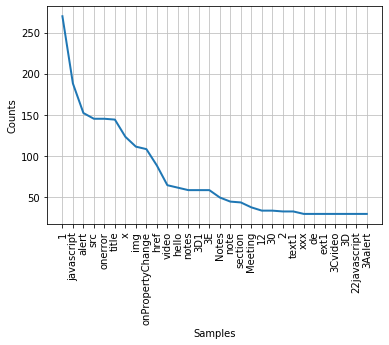

<Figure size 1440x1440 with 0 Axes>

In [316]:
# Frequency Distribution Plot
frequency_dist.plot(30,cumulative=False)
plt.figure(figsize=(20,20))
plt.show()

In [317]:
#sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

## WordCloud of Dataset

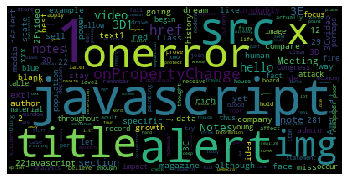

In [318]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
#plt.figuresize((12,12))
plt.show()

**Converting all words into its root words by Porter Stemmer.**

In [319]:
#NLTK provides several stemmer interfaces like Porter stemmer, #Lancaster Stemmer, Snowball Stemmer
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stems = []
for t in new_words:    
    stems.append(porter.stem(t))
print(len(stems))

17543


## Bag of Words

In [320]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token_bow = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token_bow.tokenize)
text_counts= cv.fit_transform(df['Desc'])
text_counts.shape

(1000, 798)

### Spliting dataset into train and test set

In [321]:
train_x,test_x,train_y,test_y=train_test_split(text_counts,df['isSafe'],test_size=0.3)

### Classification using  Multinomial Naive Bayes Classifier.

In [234]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(train_x, train_y)
predicted= clf.predict(test_x)
print("MultinomialNB Accuracy:",metrics.accuracy_score(test_y, predicted))

MultinomialNB Accuracy: 0.8366666666666667


## TF- Term Frequency

In [322]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfTransformer(use_idf=False).fit(text_counts)
X_train_tf = tf_transformer.transform(text_counts)
#text_tf= tf.fit_transform(df['Desc'])
X_train_tf.shape

(1000, 798)

In [323]:
train_x,test_x,train_y,test_y=train_test_split(X_train_tf,df['isSafe'],test_size=0.3)

In [324]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(train_x, train_y)
predicted= clf.predict(test_x)
print("MultinomialNB Accuracy:",metrics.accuracy_score(test_y, predicted))

MultinomialNB Accuracy: 0.8633333333333333


## TFIDF

In [325]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(text_counts)
X_train_tfidf.shape

(1000, 798)

In [326]:
train_x,test_x,train_y,test_y=train_test_split(X_train_tfidf,df['isSafe'],test_size=0.3)

In [327]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(train_x, train_y)
predicted= clf.predict(test_x)
print("MultinomialNB Accuracy:",metrics.accuracy_score(test_y, predicted))

MultinomialNB Accuracy: 0.81


## Conclusion

Multinomial Naive Bayes classifier by Term Frequency model give high accuracy 86.33% then TFID model which gives 81% test accuracy.